# Distribution Plots

Let's discuss some plots:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Imports

In [1]:
import seaborn as sns
%matplotlib inline

## Data
Seaborn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---
## distplot

The distplot shows the distribution of a univariate (**== ONE VARIABLE**) set of observations.

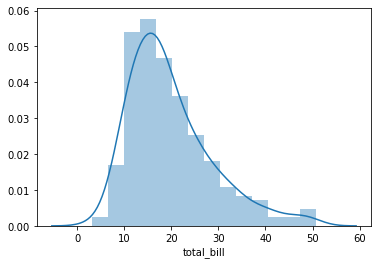

In [5]:
sns.distplot(tips['total_bill'])

I essentially got an histogram.

The line is the KDE = Kernel Density Estimation (more on that later)

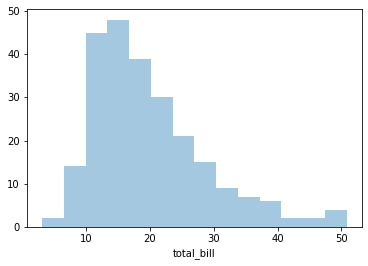

In [6]:
# I can pass an argument to remove the KDE Line
sns.distplot(tips['total_bill'], kde = False)

*Most of our total bills are between 10 dollars and 20 dollars*

I can also change the numbers of bins. The number of bins really depends on the dataset

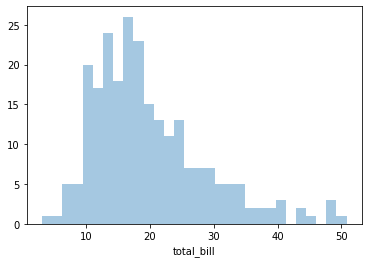

In [7]:
# Bins

sns.distplot(tips['total_bill'], kde = False, bins=30)

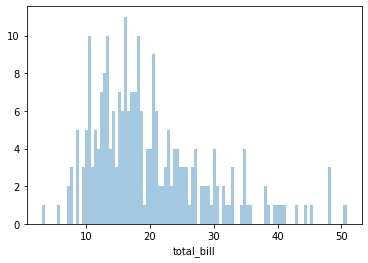

In [8]:
sns.distplot(tips['total_bill'], kde = False, bins=100)

# If I pick a total number of bins that is too high, basically I' starting to plot every single instance of my dataset

---
## jointplot

jointplot() allows you to basically match up two distplots for bivariate (**== TWO VARIABLES**) data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

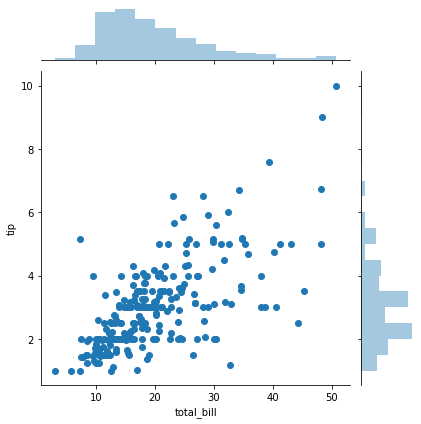

In [11]:
sns.jointplot(x ='total_bill', y = 'tip', data = tips)

The parameter **kind** allows to affect what is going on inside my joint plot

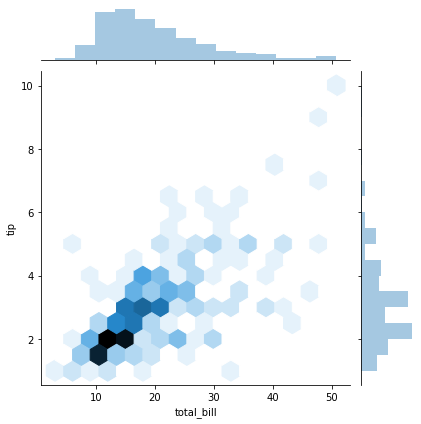

In [12]:
sns.jointplot(x ='total_bill', y = 'tip', data = tips, kind = 'hex')

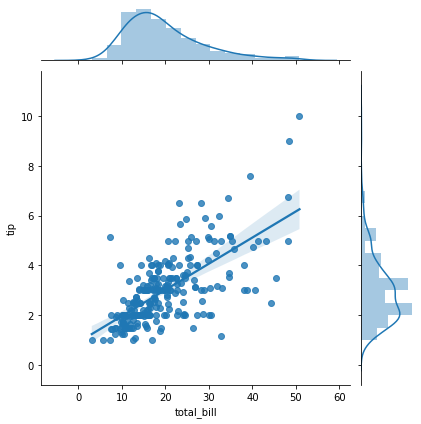

In [13]:
sns.jointplot(x ='total_bill', y = 'tip', data = tips, kind = 'reg')

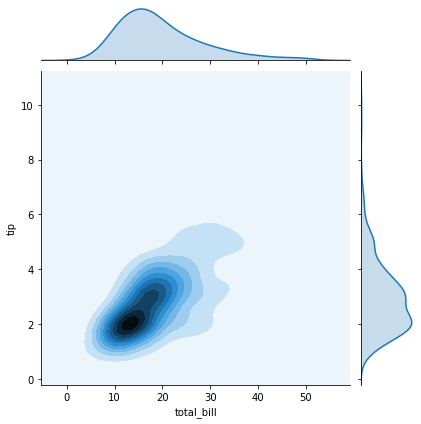

In [15]:
sns.jointplot(x ='total_bill', y = 'tip', data = tips, kind = 'kde')

# shows the density of where these points match up the most

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

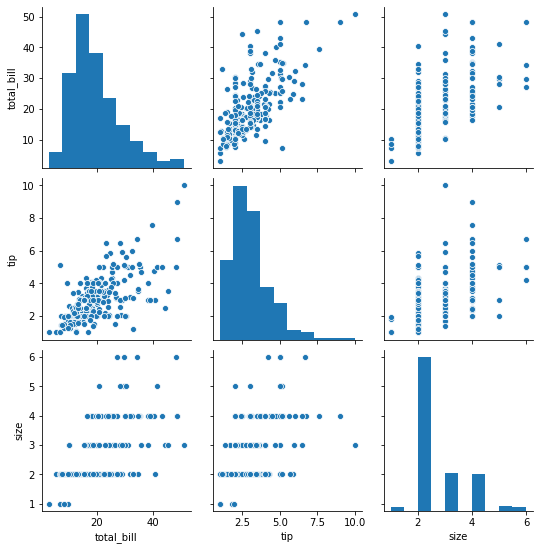

In [16]:
sns.pairplot(tips)

**What does this pairplot do? Essentially is going to do the jointplot for every single combination of the numerical columns in this data frame**

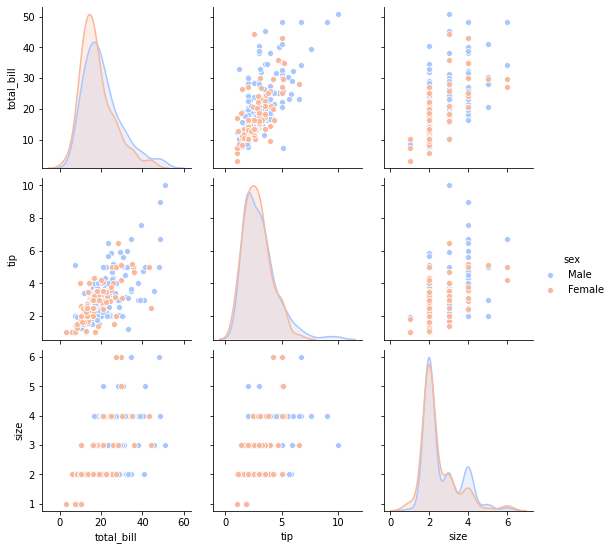

In [19]:
sns.pairplot(tips,hue='sex', palette = 'coolwarm')

# The hue argument is where I pass the column name of a categorical column

# The palette allows me to color this with a specific color palette

---
## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

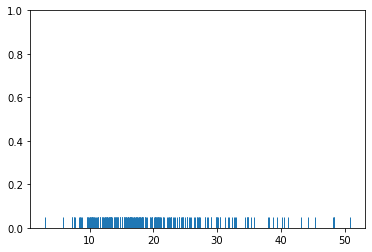

In [20]:
sns.rugplot(tips['total_bill'])

If we compare it to the histogram, the historgram has bin and counts how many dashes there is on that bin and shows it as a number

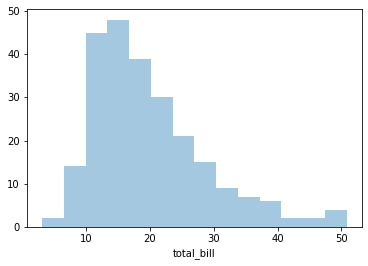

In [22]:
sns.distplot(tips['total_bill'], kde = False)

Let's do the bridge to KDE with the idea of the rug plot

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

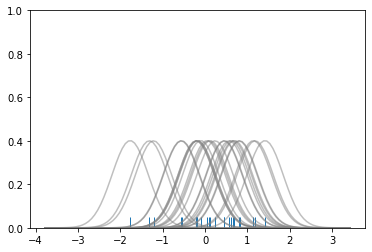

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

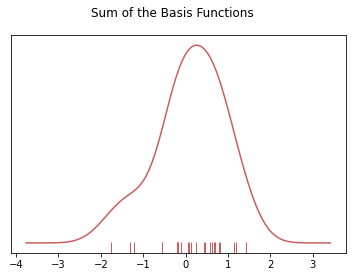

In [24]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

**So with our tips dataset:**

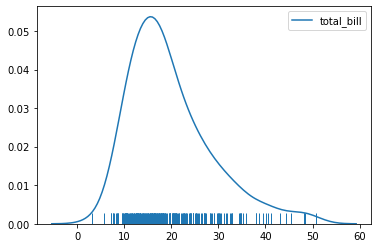

In [25]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

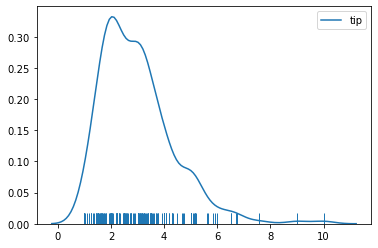

In [26]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])